Train RMSE: 3.1319002658254274
Test RMSE: 2.1994234784814912
R-squared: 0.9964557269589985


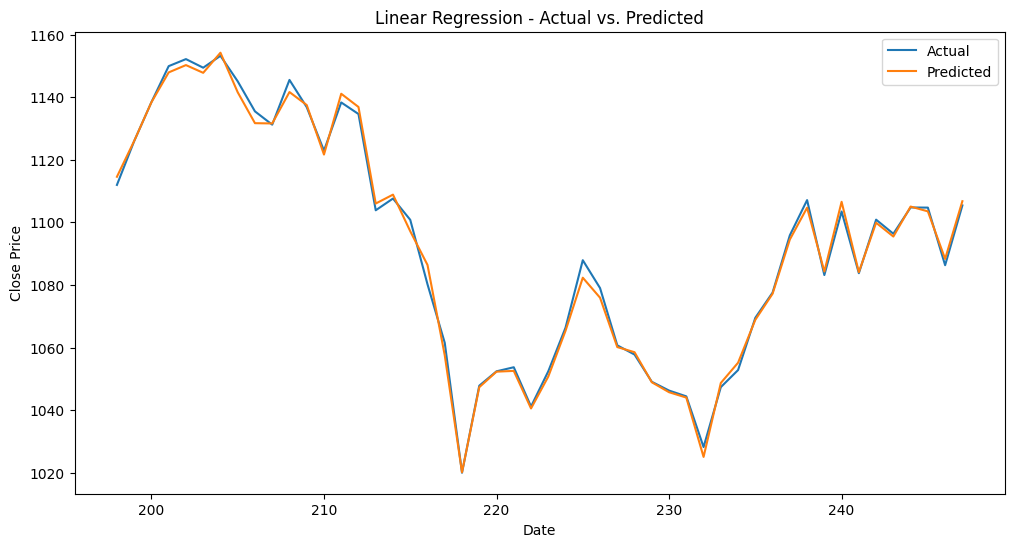

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def load_data():
    # Example data loading (replace with your actual data loading code)
    data = pd.read_csv('infy_stock.csv')
    return data

data = load_data()

x = data.drop(columns=['Close', 'Date', 'Symbol', 'Series'])  # Assuming 'Date', 'Symbol', 'Series' are not used as features
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"R-squared: {r2}")

# Plotting predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual')
plt.plot(data.index[-len(y_test):], y_test_pred, label='Predicted')
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()